In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


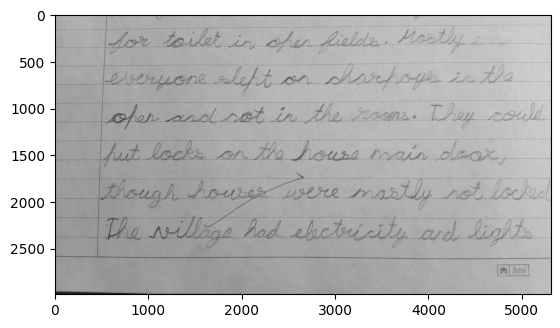

In [86]:
img=cv2.imread('temp.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img=255-img
plt.imshow(img,cmap='gray')

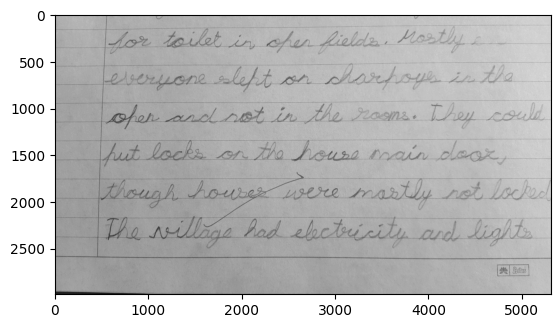

In [88]:
filtered_image= cv2.bilateralFilter(img, 5, 50, 50) 
plt.imshow(filtered_image,cmap='gray')

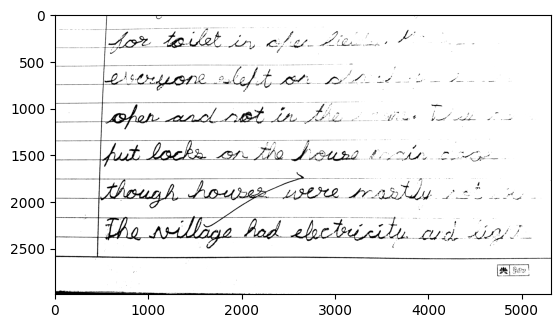

In [89]:
ret,threshold_img=cv2.threshold(filtered_image,135,255,cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

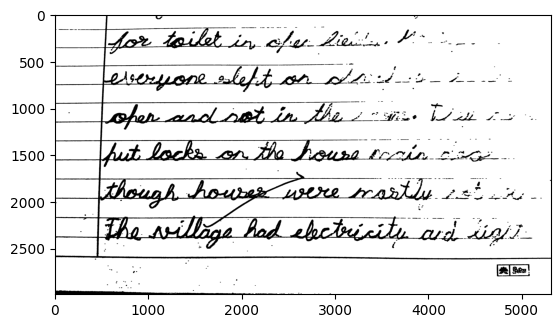

In [90]:
element=np.ones((5,10),np.uint8)
dilated_img=cv2.erode(threshold_img,element)
plt.imshow(dilated_img,cmap='gray')

Number of Contours found = 132


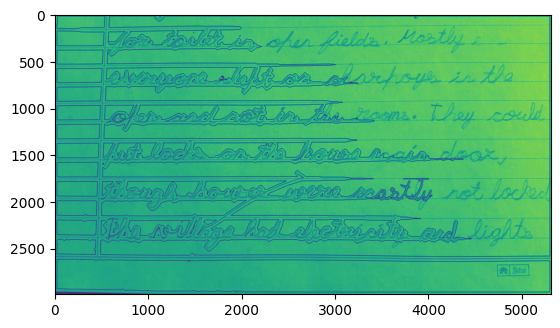

In [91]:
contours, hierarchy = cv2.findContours(dilated_image,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  

  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
image= img.copy()
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
plt.imshow(image)

In [95]:
angle_list=list()
for ctr in contours:
        center,dim,angle=cv2.minAreaRect(ctr)
        if(dim[1]<20): #as paper asked to ignore boxes with height less than 20 pixels
          continue
        if angle>80:
            angle=90-angle
        elif angle<-45:
            angle=angle+90
        angle_list.append(angle)
baseline_angle=np.var(angle_list)
print(baseline_angle)

416.43934973998546
